# Time series

One of the most frequent diagnose of a dataset is to plot a time series to see how the values evolve with time. In this example we display the changes in atmospheric CO2 concentration measured in the remote station of Barrow, in Alaska, US.  

Basic libraries are loaded to create the time series

In [22]:
import matplotlib.pyplot as pl
pl.rcParams['figure.figsize'] = [12, 8]
import datetime as dt
import textwrap as tw

Empty arrays are defined to store the atmospheric CO2 concentration and the corresponding year

In [23]:
obs=[]
day=[]

The data used is the time series of CO2 concentration at Barrow, Alaska. 

In [24]:
fobs = open('../../DATA/co2_brw_surface_1980_2005.txt','r')

We read line by line the .txt file and we assign each value to our arrays

In [25]:
for w in fobs.readlines():
    line= w.strip()
    data = line.split(" ")
    day.append(str(data[1])+"-"+str(data[2])+"-"+str(data[3]))
    obs.append(float(data[7]))
fobs.close()

We have created an array with the day of the measurement with the structure year-month-day. We can check the first five days of measurements, being always the first day of the month. 

In [26]:
day[0:5]

['1980-1-1', '1980-2-1', '1980-3-1', '1980-4-1', '1980-5-1']

From the day, month and year we create a proper time stamp for each day. 

In [27]:
thedate = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in day]
thedate[0:5]

[datetime.date(1980, 1, 1),
 datetime.date(1980, 2, 1),
 datetime.date(1980, 3, 1),
 datetime.date(1980, 4, 1),
 datetime.date(1980, 5, 1)]

The time series is now built using the .plot( ) function in matplotlib, with all necessary titles and labels

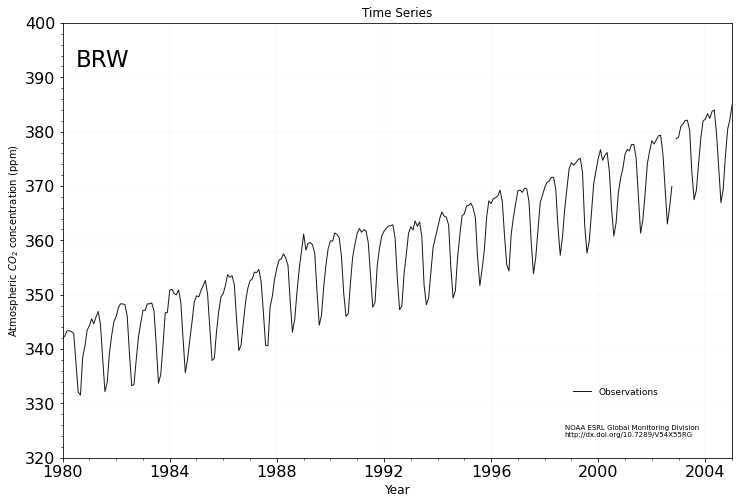

In [31]:
fig, ax = pl.subplots(1,1)

ax.plot(thedate[0:301],obs[0:301],color='black',linewidth=1, alpha=0.9, label='Observations')

ax.minorticks_on()
ax.tick_params(axis='y',which='minor',bottom='off')
ax.tick_params(axis='x',which='minor',bottom='off')

ax.legend(fontsize=9,frameon=False,loc="upper left", bbox_to_anchor=(0.75,0.18))

comment1_txt = '''\
NOAA ESRL Global Monitoring Division
http://dx.doi.org/10.7289/V54X55RG
    '''
annot_txt = tw.fill(tw.dedent(comment1_txt.rstrip()), width=40)
ax.text(.75, .05, annot_txt, horizontalalignment='left', rotation=0, wrap=True, bbox={'facecolor':'none', 'alpha':0.0, 'pad':2},
        transform=ax.transAxes, fontsize=7)
ax.text(.02,.9,'BRW',fontsize=23,
        horizontalalignment='left',
        transform=ax.transAxes)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(linestyle='dotted',linewidth=.2, alpha=0.8)    

ax.set_xlabel('Year', fontsize=12,linespacing=4.2)
ax.set_ylabel('Atmospheric $CO_2$ concentration (ppm)', fontsize=10)

ax.set_ylim(320,400,10)

datemin=thedate[0]
datemax=thedate[300]

ax.set_xlim(datemin, datemax)

pl.title('Time Series')
pl.show() 